Están a punto de entrar a un casino para apostar a la ruleta de la vida, su misión, **¡Ganarle a la casa!**

Dentro del casino prestan atención a todos los juegos, y descubren que hay una ruleta con 38 casillas y las siguientes reglas para jugar:

1.   Máximo pueden apostar 2,048 pesos
2.   No pueden a postar a todas las casillas a la vez
3.   Sólo pueden apostar a máximo 10 ruletas al mismo tiempo
4.   Si la canica cae en las casillas 1 o 2, todos pierden
4.   La ganancia es de 37 a 1, es decir, por cada peso apostado en una casilla ganadora, nos darán 37 pesos

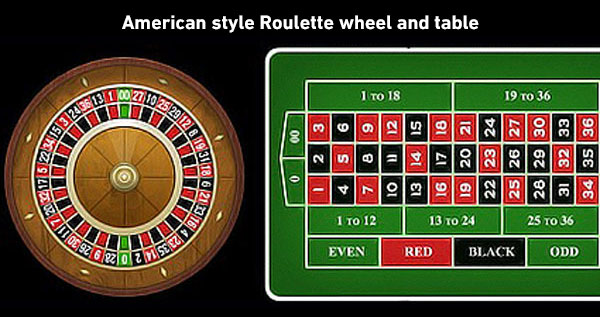

RETO: Usando las 10 ruletas y con todos los intentos que quieran, creén un método para ganar 1,000,000  empezando con 128.

Pista: Pueden elegir la cantidad apostada en cada juego. 

*Nota: Pueden trabajar en equipos de entre 1 y 5 personas. Tienen 1 semana para resolverlo (domingo 7 a media noche) y la respuesta debe ser en python haciendo simulaciones (Pueden usar las funciones que ya crearon)*

La premiación se realizará solo con aquellos que enviado el reto resuelto antes de la fecha pactada

Autor: **Daniel Eduardo López**

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter

In [2]:
mpl.style.use('ggplot') # For ggplot style

In [3]:
# Función ruleta
def ruleta(apuesta, monto_apuesta):
    """
    Esta función simula jugar un juego de ruleta un cierto número de veces apostando siempre al mismo número, 
    guarda el resultado del juego y de acuerdo con la apuesta, calcula y almacena las ganancias obtenidas (o pérdidas) por juego.
    """
    monto_ganancia = monto_apuesta * 37
    resultado_juego = random.randint(0, 36)
    if resultado_juego == apuesta:
       resultado_ganancia = monto_ganancia
    else:
       resultado_ganancia = -monto_apuesta
    return resultado_juego, resultado_ganancia

In [4]:
# Probando la función ruleta
no = 33
print(no)
ruleta(apuesta = no, monto_apuesta = 1)

33


(3, -1)

Lo anterior quiere decir que aposté 1 panchodólar al 33, pero salió otro número y perdí mi apuesta.

In [5]:
# Función 10 ruletas
def ruletas(apuesta, monto_apuesta):
  resultados_juegos = np.asanyarray([])
  resultados_ganancias = np.asanyarray([])
  for i in range(1,11):
    resultado_juego_ruleta, resultado_ganancia_ruleta = ruleta(apuesta, monto_apuesta)
    resultados_juegos = np.append(resultados_juegos, resultado_juego_ruleta)
    resultados_ganancias = np.append(resultados_ganancias, resultado_ganancia_ruleta)                             
  return resultados_juegos, resultados_ganancias


In [6]:
# Probando la función 10 ruletas
resultados_juegos, resultados_ganancias = ruletas(33, 1)
print(f'Resultados ganancias: {resultados_ganancias.sum()}')
print(f'Resultados juegos: {resultados_juegos}')

Resultados ganancias: 28.0
Resultados juegos: [21. 14. 23.  4. 33.  6. 20. 35. 11. 31.]


In [7]:
# Código para ganar la ruleta de la vida jugando 10 ruletas a la vez
apuesta = random.randint(3,36)
monto_apuesta = 1
resultados_juegos_total = np.asanyarray([])
resultados_ganancias_total = np.asanyarray([])
resultados_ganancias_por_juego = np.asanyarray([])

for i in range(5000):
  try:
    ganancia_previa = resultados_ganancias_por_juego[i-1]
  except:
    ganancia_previa = 0
  
  resultados_juego, resultados_ganancia = ruletas(apuesta, monto_apuesta)

  resultados_juegos_total = np.append(resultados_juegos_total, resultados_juego)
  resultados_ganancias_por_juego = np.append(resultados_ganancias_por_juego, resultados_ganancia.sum())
  resultados_ganancias_total = np.append(resultados_ganancias_total, resultados_ganancia)

  # Apostamos a números que no estén dentro de la lista de números con mayores modas
  modas = sorted(Counter(resultados_juegos_total), key=Counter(resultados_juegos_total).get, reverse= True)[0:25]
  apuesta = random.randint(3,36) 
  
  while apuesta in modas:
    apuesta = random.randint(3,36)
  
  #print(f'moda: {modas}, apuesta: {apuesta}')

  if resultados_ganancia.sum() >= ganancia_previa and resultados_ganancia.sum() > 0:
    monto_apuesta = monto_apuesta + 2048
  else:
    monto_apuesta = 1

print(f'Se han jugado {resultados_juegos_total.size} ruletas en total.')
#print(f'Por cada ronda de 10 ruletas, se han obtenido las siguientes ganancias por ronda: {resultados_ganancias_por_juego}')
print(f'La ganancia total por todas las jugadas es: ${resultados_ganancias_total.sum():,.2f}')

Se han jugado 50000 ruletas en total.
La ganancia total por todas las jugadas es: $1,496,948.00


La clave de este código está en el número de simulaciones, entre más jugadas se hagan, mayor probabilidad de seleccionar números ganadores que compensen las apuestas fallidas.

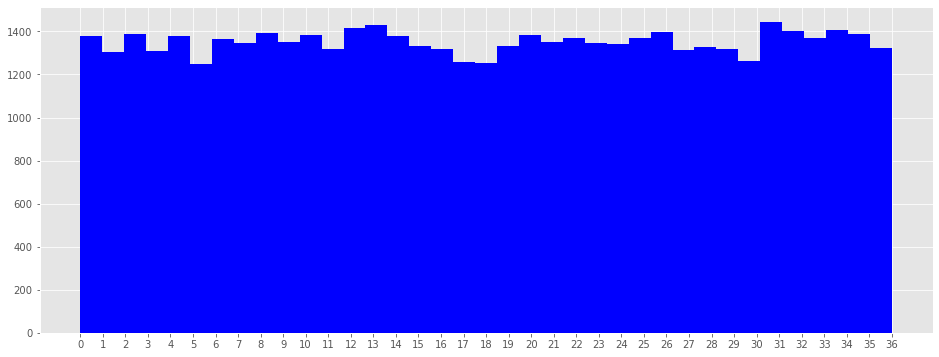

In [8]:
# Histograma de la distribución de resultados de las ruletas
f, axes = plt.subplots(figsize = (16,6) )
plt.hist(resultados_juegos_total, bins = 37, color = "Blue")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])
plt.show()

En el histograma anterior se aprecia que, conforme el número de simulaciones aumenta, todos los números tienen la misma distribución, lo que implica que todos tienen aproximadamente la misma probabilidad de ser números ganadores (1/37).

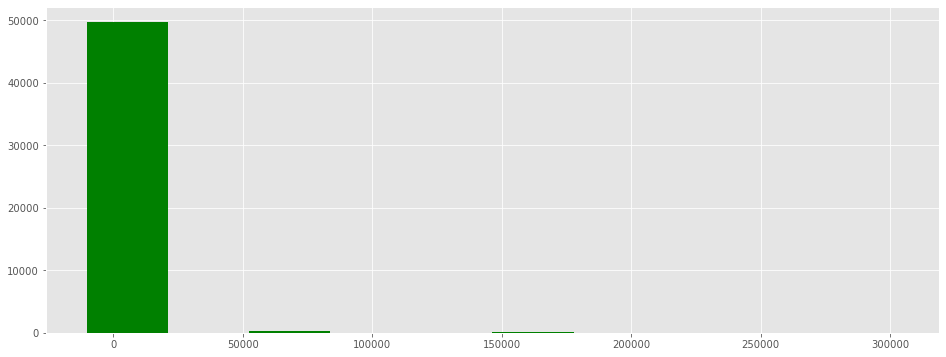

In [9]:
# Histograma de la distribución de ganacias de las apuestas
f, axes = plt.subplots(figsize = (16,6) )
plt.hist(resultados_ganancias_total, color = "Green")
plt.show()

El histograma anterior muestra que la mayor parte de las apuestas fueron fallidas. De ahí la necesidad de minimizar la apuesta la mayor parte de las veces.